In [9]:
# We will classify Cell types with different classifiers 
# Here it would be KNNClassifier

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use raw strings or forward slashes for paths
datagen = ImageDataGenerator(rescale=1./255)

# X = datagen.flow_from_directory(r"C:/Users\Alexi/OneDrive - UW/C-NMC_Leukemia/training_data/fold_0",
#                                         target_size=(224, 224), batch_size=32, class_mode="categorical")

X = datagen.flow_from_directory(r"C:/Users\Alexi/OneDrive - UW/C-NMC_Leukemia/training_data/fold_1", class_mode="categorical")

y = datagen.flow_from_directory(r"C:/Users/Alexi/OneDrive - UW/C-NMC_Leukemia/testing_data", class_mode="categorical")

from sklearn.model_selection import train_test_split
X_train_list = []
y_train_list = []
X_test_list = []
y_test_list = []

# Loop through all batches in the training set
for _ in range(len(X)):
    X_batch, y_batch = next(X)
    X_train_list.append(X_batch)
    y_train_list.append(y_batch)

# Loop through all batches in the test set
for _ in range(len(y)):
    X_batch, y_batch = next(y)
    X_test_list.append(X_batch)
    y_test_list.append(y_batch)

# Convert lists to NumPy arrays
X_train = np.vstack(X_train_list)
y_train = np.vstack(y_train_list)
X_test = np.vstack(X_test_list)
y_test = np.vstack(y_test_list)

# Convert labels to single-class format (from one-hot encoding)
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

# Flatten images for easier model processing
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

from sklearn.decomposition import PCA

pca = PCA(n_components= 100)  # Adjust 'n_components' based on explained variance preference
X_train_flat = pca.fit_transform(X_train_flat)
X_test_flat = pca.transform(X_test_flat)

# Use train_test_split on extracted data
X_train, X_test, y_train, y_test  = train_test_split(X_train_flat, y_train, test_size=0.3)

print(X.class_indices)


Found 3581 images belonging to 2 classes.
Found 2586 images belonging to 1 classes.
{'all': 0, 'hem': 1}


In [10]:
# KNN Classifier applied to classify the flowers 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


KNNCL = KNeighborsClassifier(n_neighbors=3) #varry K number of neighbors
KNNCL.fit(X_train, y_train)

# estimate accuracy for Training and Testing

print("Training Score: {}".format(KNNCL.score(X_train, y_train)))
print("Testing Score: {}".format(KNNCL.score(X_test, y_test)))

Training Score: 0.8994413407821229
Testing Score: 0.7925581395348837


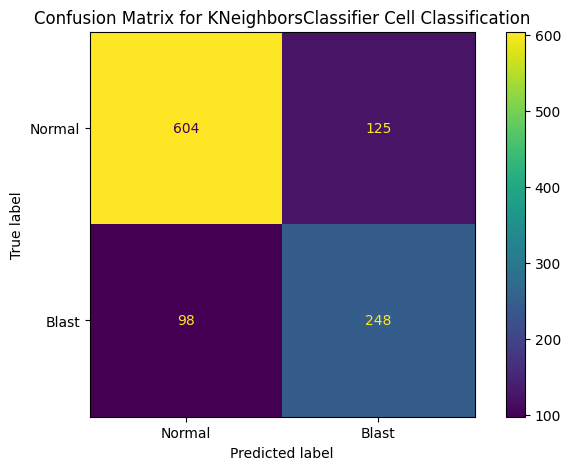

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np


y_pred = KNNCL.predict(X_test)
# Convert labels if necessary
if len(y_test.shape) > 1:  # Apply argmax only if more than 1 dimension
    y_test_binary = np.argmax(y_test, axis=1)
    y_pred_binary = np.argmax(y_pred, axis=1)
else:
    y_test_binary = y_test  # Already correct format
    y_pred_binary = y_pred
# Define class labels
y_names = ["Normal", "Blast"]

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
ConfusionMatrixDisplay.from_predictions(y_test_binary, y_pred_binary, ax=ax, display_labels=y_names)

ax.set_title(f"Confusion Matrix for {KNNCL.__class__.__name__} Cell Classification")
plt.show()



In [13]:
# We will classify Cell types with different classifiers 
# Here it would be KNNClassifier

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Use raw strings or forward slashes for paths
datagen = ImageDataGenerator(rescale=1./255)

X = datagen.flow_from_directory(r"C:/Users\Alexi/OneDrive - UW/C-NMC_Leukemia/training_data/fold_0",
                                         target_size=(224, 224), batch_size=32, class_mode="categorical")

y = datagen.flow_from_directory(r"C:/Users/Alexi/OneDrive - UW/C-NMC_Leukemia/testing_data",
                                        target_size=(224, 224), batch_size=32, class_mode="categorical")

from sklearn.model_selection import train_test_split

# Extract one batch at a time from generator
X_train, y_train = next(X)  # Fetch a batch
X_test, y_test = next(y)  # Fetch a batch

# Flatten images for easier model processing
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Use train_test_split on extracted data
X_train, X_test, y_train, y_test  = train_test_split(X_train_flat, y_train, test_size=0.3)

print(X.class_indices)

Found 3527 images belonging to 2 classes.
Found 2586 images belonging to 1 classes.
{'all': 0, 'hem': 1}


In [16]:
from sklearn.model_selection import cross_val_score

k_values = [i for i in range (1,15)]
scores = []

for k in k_values:
    KNNCLk = KNeighborsClassifier(n_neighbors=k)
    scorescv = cross_val_score(KNNCLk, X_train, y_train,cv=5)
    scores.append(scorescv.mean())


Text(0, 0.5, 'Accuracy Score')

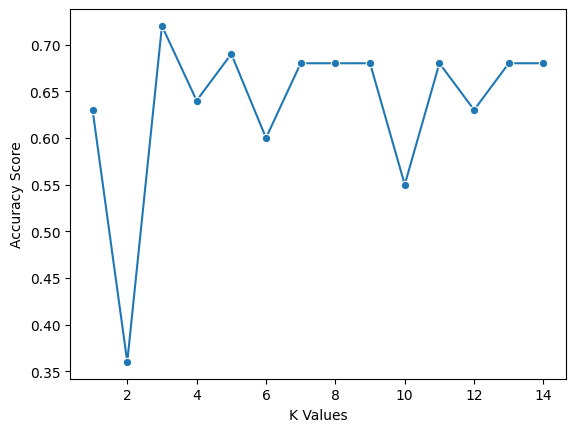

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")


In [20]:
kopt = k_values[np.argmax(scores)]

print("Optimal k ={} ".format(kopt))

Optimal k =3 


In [21]:

KNNCL = KNeighborsClassifier(n_neighbors=kopt)
KNNCL.fit(X_train, y_train)

from sklearn.metrics import classification_report

y_pred_tr = KNNCL.predict(X_train)
y_pred_test = KNNCL.predict(X_test)

print(classification_report(y_pred_tr, y_train))
print(classification_report(y_pred_test, y_test))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        16
           1       0.71      0.83      0.77         6

   micro avg       0.86      0.86      0.86        22
   macro avg       0.82      0.85      0.84        22
weighted avg       0.87      0.86      0.87        22
 samples avg       0.86      0.86      0.86        22

              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.00      0.00      0.00         0

   micro avg       0.60      0.60      0.60        10
   macro avg       0.50      0.30      0.38        10
weighted avg       1.00      0.60      0.75        10
 samples avg       0.60      0.60      0.60        10



c:\Users\Alexi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
